<a href="https://colab.research.google.com/github/Wanying-JIANG/WanyingJIANG/blob/master/visualization_foodie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np

# Plot data-points with matplotlib

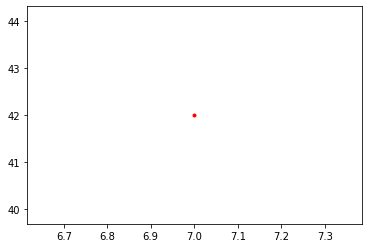

In [3]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
plt.plot([7], [42], marker = 'o', markersize = 3, color = "red")

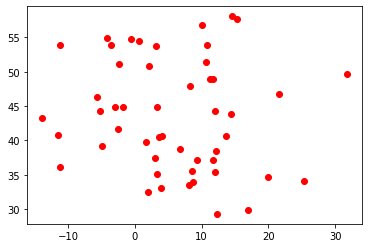

In [4]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(2, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
plt.plot(datapoints[0, :], datapoints[1, :], 'ro')

Text(0.0, 1.0, 'useless point clouds')

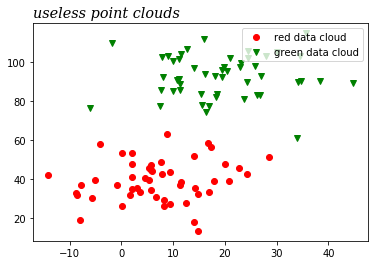

In [5]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(50, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]

# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

# plot data cloud1 with red points
# plot data cloud2 with green triangles
# data cloud1 is called "red data cloud"
# data cloud2 is called "green data cloud"
# title of the plot should be "useless point clouds"
plt.plot(datacloud1[0, :], datacloud1[1, :], 'ro', label = 'red data cloud')
plt.plot(datacloud2[0, :], datacloud2[1, :], 'gv', label = 'green data cloud')
plt.legend(loc = 'upper right')
plt.title('useless point clouds', loc = 'left', fontfamily = 'serif', fontstyle = 'italic', fontsize = 'x-large')


# Plot curves with matplotlib

Text(0.5, 1.0, 'useless curves')

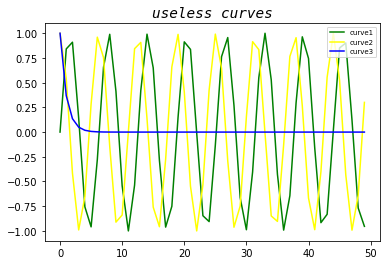

In [6]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))
# plot functions
# colors, labels, title, legends...

plt.plot(curve1, 'green', label = 'curve1')
plt.plot(curve2, 'yellow', label = 'curve2')
plt.plot(curve3, 'blue', label = 'curve3')
plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.title('useless curves', fontstyle = 'italic', fontsize = 'x-large', fontfamily = 'monospace')



## Let's use some real data

(506,)
(13,)
(506, 13)


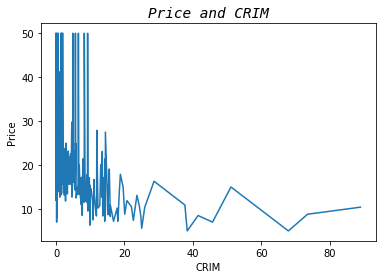

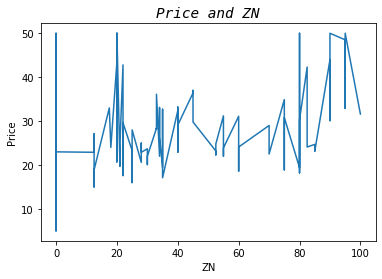

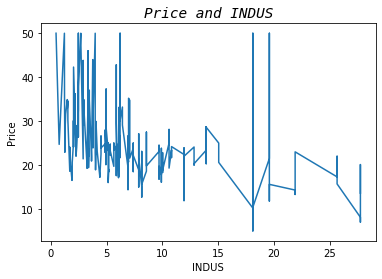

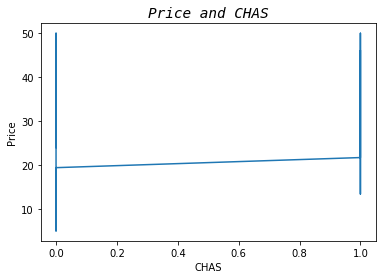

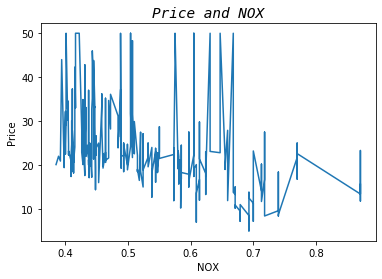

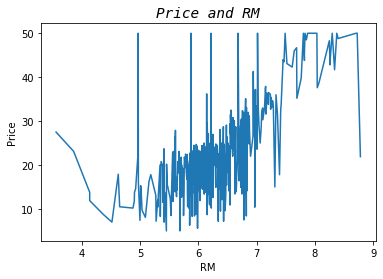

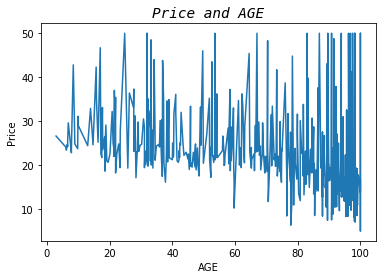

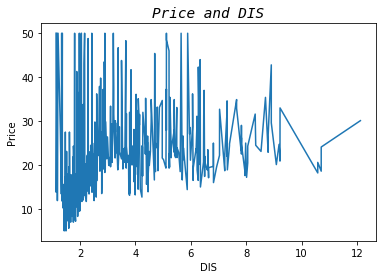

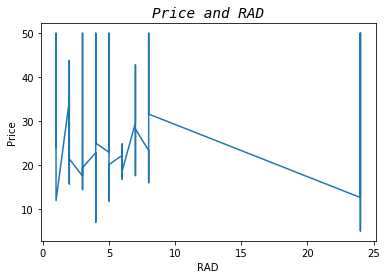

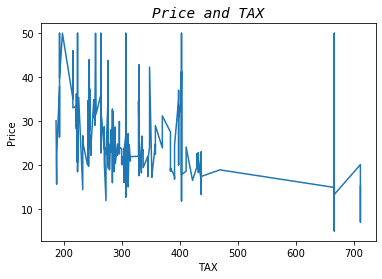

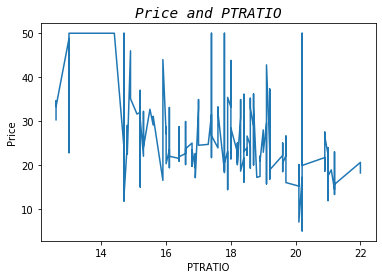

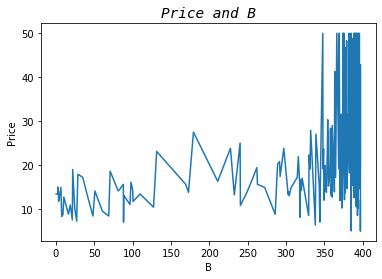

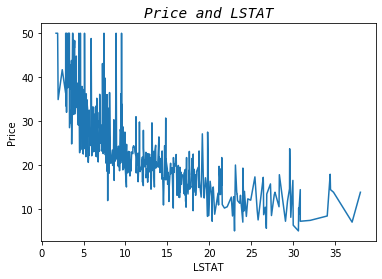

In [7]:
from sklearn import datasets
boston = datasets.load_boston()
# check the following attributes of boston:
# - boston.target (prices)
# - boston.feature_names (name of descriptor's components)
# - boston.data (values of each feature for each house in the dataset)
boston.target
boston.feature_names
boston.data
print(boston.target.shape)
print(boston.feature_names.shape)
print(boston.data.shape)


# Plot a curve price = f(feature) for every feature in the dataset
for i in range(13):
  x = boston.data[:,i]
  y = boston.target
  a = np.argsort(x, axis=0)
  x = np.take_along_axis(x,a,axis=0)
  y = np.take_along_axis(y,a,axis=0)
  plt.plot(x,y)
  plt.xlabel('{}'.format(boston.feature_names[i]))
  plt.ylabel('Price')
  plt.title('Price and {}'.format(boston.feature_names[i]), fontstyle = 'italic', fontsize = 'x-large', fontfamily = 'monospace' ) 
  plt.show()

# x1 = boston.data[:,0]
# y = boston.target
# a = np.argsort(x1, axis=0)
# x1 = np.take_along_axis(x1, a, axis=0)
# y = np.take_along_axis(y,a,axis=0)
# plt.plot(x1,y)
# plt.xlabel('CRIME')
# plt.ylabel('Price')
# plt.title('Price and Crime', fontstyle = 'italic', fontsize = 'x-large', fontfamily = 'monospace' )

# titles and named axes plz
# You might need np.argsort at some point...

    

# Read data from files with pandas and plot with seaborn

In [0]:
import pandas as pd
import seaborn as sns

     Unnamed: 0  accuracies  epochs  distance parameter  experiment
0             0    0.696591       0  0.042117     k=0,5           0
1             1    0.851136       1  0.044463     k=0,5           0
2             2    0.896591       2  0.046504     k=0,5           0
3             3    0.912500       3  0.047552     k=0,5           0
4             4    0.922727       4  0.048296     k=0,5           0
..          ...         ...     ...       ...       ...         ...
635          15    0.923864      15  0.054504     k=0,6           7
636          16    0.923864      16  0.054335     k=0,6           7
637          17    0.923864      17  0.054138     k=0,6           7
638          18    0.925000      18  0.054009     k=0,6           7
639          19    0.924432      19  0.053821     k=0,6           7

[640 rows x 6 columns]


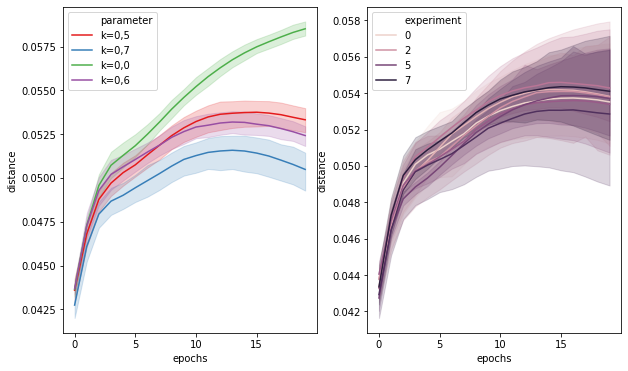

In [18]:
# read csv file with pandas
# csv file: euclidean_training.csv

from google.colab import files
# uploaded = files.upload()


data = pd.read_csv('euclidean_training.csv')
# print the resulting dataframe
print(data)
# create the matplotlib object
fig, ax = plt.subplots(1, 2, figsize = (10, 6), sharex = True)
# plot with sns
# plot distance = f(epochs)
palette = sns.color_palette("Set1", n_colors = 4)
sns.lineplot(x = "epochs", y = "distance", hue = "parameter", palette = palette, data = data, ax = ax[0])  
## "hue": Grouping variable that will produce lines with different colors.
# one color = one value of parameter k
# for every value of k, multiple experiments were run 
# (i.e. multiple curves distance=f(epochs) exist)
# seaborn plots the average with transparency for dispersion
sns.lineplot(x = "epochs", y = "distance", hue = "experiment", data = data, ax = ax[1])

# Plot geographical data

In [0]:
import os, ssl
import smopy
from matplotlib import pyplot as plt
import numpy as np
import json

# The following might be unnecessary (or even produce an error...)
# comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
# Here is a convenient object to create maps (geographical).
class Map(object):
    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]
    

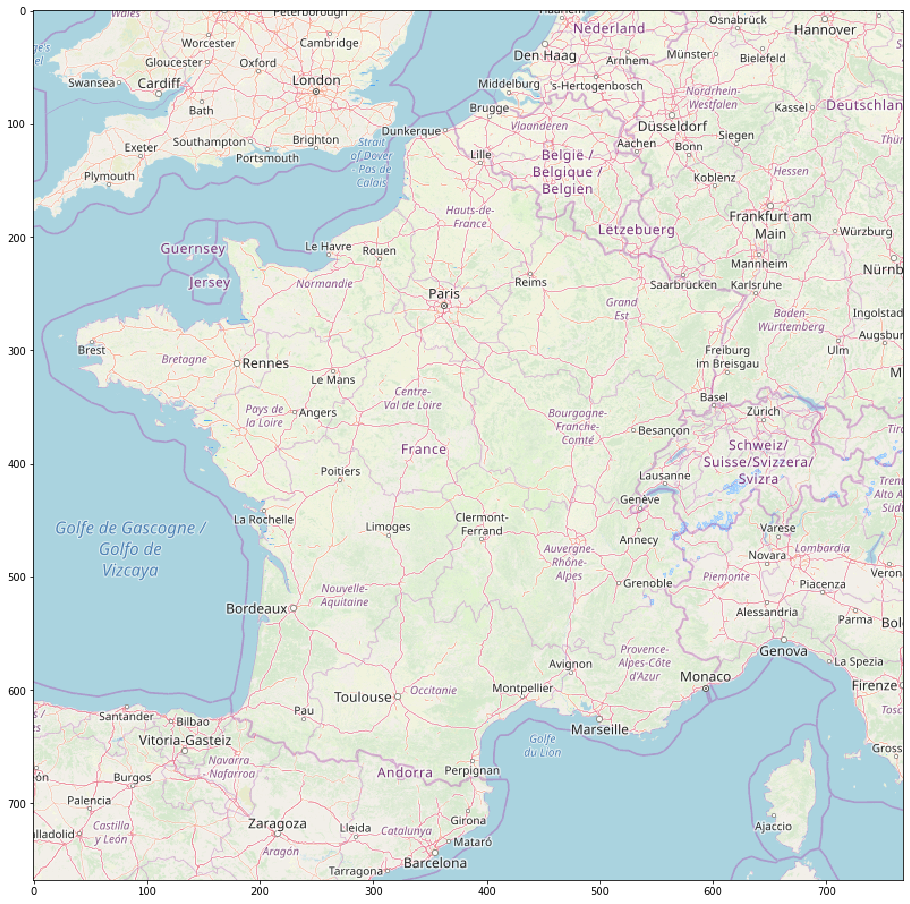

In [27]:
# plot an image with matplotlib
my_map = Map(45., -1., 48.9, 5.5, 6)
image = my_map.get_image()
# create figure
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
ax.imshow(image)
plt.show()

(768, 768, 3)
362 260


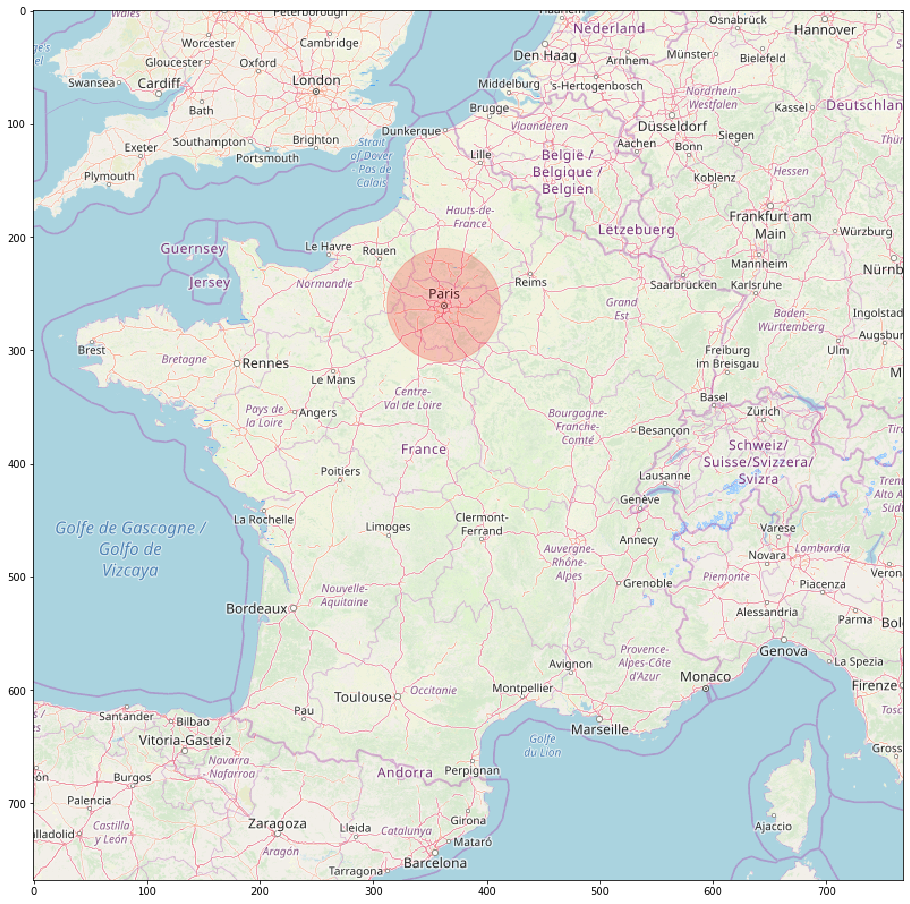

In [35]:
from matplotlib.patches import Circle
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_image_pixels(Paris_latitude, Paris_longitude)
print(x, y)
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax with a red circle placed on Paris
circ = Circle(xy = (x, y), radius = 50, color = 'r', alpha = 0.2)
ax.add_patch(circ)

# Show the image
ax.imshow(image)
plt.show()

In [53]:
df = json_normalize(data)
df.head()
df.columns
# df['type_d_ecole'].value_counts()

Index(['datasetid', 'recordid', 'record_timestamp', 'fields.reg_id',
       'fields.dep_id', 'fields.adresse_uai', 'fields.com_code',
       'fields.uucr_id', 'fields.aca_nom', 'fields.type_d_etablissement',
       'fields.coordonnees', 'fields.reg_nom', 'fields.com_nom', 'fields.uai',
       'fields.url', 'fields.dep_nom', 'fields.aca_id',
       'fields.pays_etranger_acheminement', 'fields.uucr_nom',
       'fields.element_wikidata', 'fields.localite_acheminement_uai',
       'fields.uo_lib', 'fields.code_postal_uai', 'geometry.type',
       'geometry.coordinates', 'fields.sigle', 'fields.rattachement',
       'fields.numero_telephone_uai', 'fields.rattachement_identifiants',
       'fields.dernier_decret_legifrance', 'fields.mention_distribution',
       'fields.lieu_dit_uai', 'fields.boite_postale_uai'],
      dtype='object')

TypeError: ignored

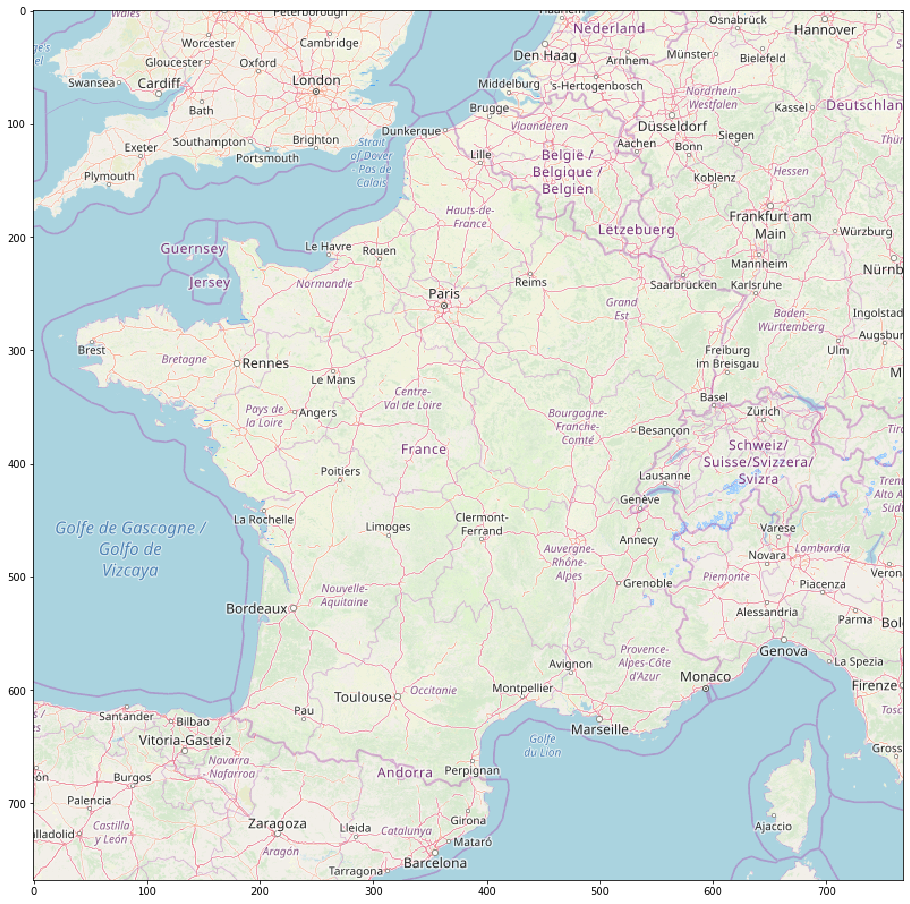

In [78]:
from pandas.io.json import json_normalize

# load a json file
# file is: fr-esr-principaux-etablissements-enseignement-superieur.json
with open("fr-esr-principaux-etablissements-enseignement-superieur.json", "r") as f:
    data = json.load(f)


 ## convert json file to Data Frame   
df = json_normalize(data)

## aggregate type_d_etablissement to a new variable type_d_ecole
df['type_d_ecole'] = 'artistique'
df.loc[df["fields.type_d_etablissement"].str.contains("ingénieurs"), 'type_d_ecole'] = 'ingénieurs'
df.loc[df["fields.type_d_etablissement"].str.contains("commerce"), 'type_d_ecole'] = 'commerce'

## coordinates
coord = list(df["geometry.coordinates"])

fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
ax.imshow(image)
# plot schools with circles
# set a different color/shape for 'artistique', 'ingenieur' and 'commerce' labels



for xx, yy, zz in zip(coord[0], coord[1], df.type_d_ecole):
    if zz =="ingénieurs":
        circ = Circle((xx,yy), radius = 3, color='red')
        ax.add_patch(circ)
    if zz == "commerce":
        circ = Circle((xx,yy), radius = 3, color='green')
        ax.add_patch(circ)
    if zz == "artistique":
        circ = Circle((xx,yy), radius = 3, color='yellow')
        ax.add_patch(circ)

plt.show()

# Charts

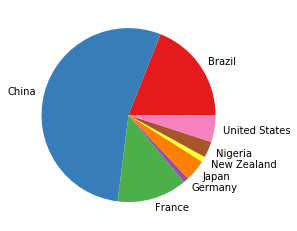

In [71]:
# Load csv: users.csv
users = pd.read_csv('users.csv')
users.head()
# plot a pie chart of nationality of the users
nb_users_country = users.groupby(['country']).count()
palette = sns.color_palette("Set1", n_colors = 8)
sizes = nb_users_country.user_id
labels = list(nb_users_country.index)

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, colors = palette)
plt.show()

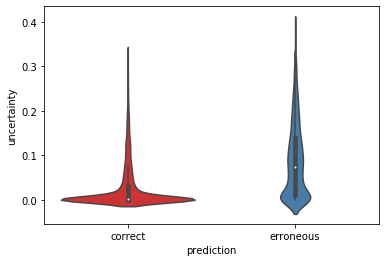

In [70]:
# Load uncertainty.csv
uncertainty = pd.read_csv("uncertainty.csv")
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities
fig, ax = plt.subplots()
ax = sns.violinplot(x = "prediction", y = "uncertainty", palette= palette, data = uncertainty)
plt.show()